<a href="https://colab.research.google.com/github/thehapyone/Thesis_Project/blob/master/data_evaluation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing v3

 The following features missing parameters have been cleaned and updated - 
 'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'
LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL
 - 
 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_feature_engineering_data.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


## Analyzing Missing Values


In [0]:

# check columns with missing values
pd.set_option('display.max_rows', 500)
# in percentage
#100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0])
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_REGENERATIO           896
X_PSC_P1IT2_AFTERTREATMENT_REGENERATION_IN           896
LX_PSC_P1IT1_AFTERTREATMENT_REGENERATION_IN          896
LX_PSC_P1IT0_AFTERTREATMENT_REG

In [0]:
# using interativeimputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
# this feature ['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'] has a good relationship with -
# - LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING
# data['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'].isnull().value_counts()

In [0]:
data_reg_1 = data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']]


In [0]:
data_reg_1.isnull().sum().sort_values(ascending=False)

LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
imp = IterativeImputer(max_iter=10, random_state=42)


In [0]:
# perform imputation ont the missing values
result = pd.DataFrame(imp.fit_transform(data_reg_1.values), columns=data_reg_1.columns)

In [0]:
result.isnull().sum().sort_values(ascending=False)

LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
# updates the dataframe
data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']] = result

In [0]:
# updated the current database with this new changes
# save new data frame
# data.to_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_feature_engineering_data.csv", sep=',', index=False)


In [0]:
#100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0])
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_REGENERATIO           896
X_PSC_P1IT2_AFTERTREATMENT_REGENERATION_IN           896
LX_PSC_P1IT1_AFTERTREATMENT_REGENERATION_IN          896
LX_PSC_P1IT0_AFTERTREATMENT_REG

In [0]:
data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].shape[0]

4092

In [0]:
############ 
# Analzing this features
'''
LX_PMU_P1FH1_SLOPE_X_INDEX_5                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_30                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_31                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_4                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_9                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_6                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_7                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_8                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_28                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_29                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_3                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_27                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_18                        792
X_PMU_P1FH1_SLOPE_X_INDEX_32                         792
X_PMU_P1FH1_SLOPE_X_INDEX_1                          792
LX_PMU_P1FH1_SLOPE_X_INDEX_10                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_11                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_12                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_26                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_14                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_15                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_16                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_17                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_13                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_2                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_20                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_21                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_22                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_23                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_24                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_19                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_25                        792
'''

In [0]:
data.corr()['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL'].sort_values(ascending=False)[:20]

LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL                  1.000000
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL             0.991111
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION               0.986170
LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY                0.984915
LX_PSC_P1BBZ_TOTAL_ENGINE_REVOLUTIONS             0.972804
LX_PSC_P1IPX_TOTAL_INJECTED_UREA__L               0.964001
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME             0.961468
LX_PST_P1B3R_60_ELFUELCONSUMPTIONVEHICLERUNNIN    0.960346
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_11     0.954588
LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE              0.951978
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME                  0.950810
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_10     0.950553
LX_PSC_P1AS4_MAIN_LOG_ECON_DISTANCE               0.946402
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_9      0.945302
LX_PSC_P1BB0_TOTAL_ENGINE_TIME                    0.945157
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_12     0.944903
LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED              0.9415

In [0]:
data['LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER'].describe()

count     18371.000000
mean     168062.936369
std      114455.285430
min           0.000000
25%       80869.335329
50%      152352.147059
75%      239138.422606
max      825688.786517
Name: LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER, dtype: float64

In [0]:
# analyzing LX_PMU_P1FH1_SLOPE_X_INDEX_5

In [0]:
data['LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT'].describe()

count     18966.000000
mean     117182.619757
std       78318.406665
min           0.000000
25%       59051.656007
50%      104580.046729
75%      160621.548077
max      666247.404494
Name: LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT, dtype: float64

In [0]:
data['LX_PMU_P1FH1_SLOPE_X_INDEX_4'].describe()

count    1.916200e+04
mean     1.145499e+04
std      5.461554e+04
min      0.000000e+00
25%      4.310000e+02
50%      1.738335e+03
75%      6.123958e+03
max      2.167276e+06
Name: LX_PMU_P1FH1_SLOPE_X_INDEX_4, dtype: float64

In [0]:
temp = data[data['T_CHASSIS'] == 'O-695072']

In [0]:
temp.corr()['LX_PMU_P1FH1_SLOPE_X_INDEX_2'].sort_values(ascending=False)[:20]

DAY                             NaN
MONTH                           NaN
YEAR                            NaN
Malfunction_Label               NaN
RUL                             NaN
INT_BWSD                        NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_10   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_11   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_12   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_13   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_14   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_15   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_16   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_17   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_18   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_19   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_2    NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_20   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_21   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_22   NaN
Name: LX_PMU_P1FH1_SLOPE_X_INDEX_2, dtype: float64

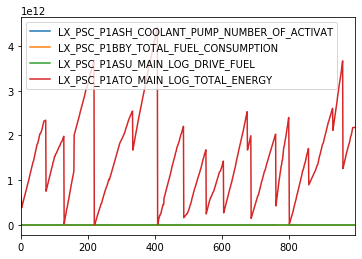

In [0]:
data[['LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', ]][:1000].plot()

### Updating LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL

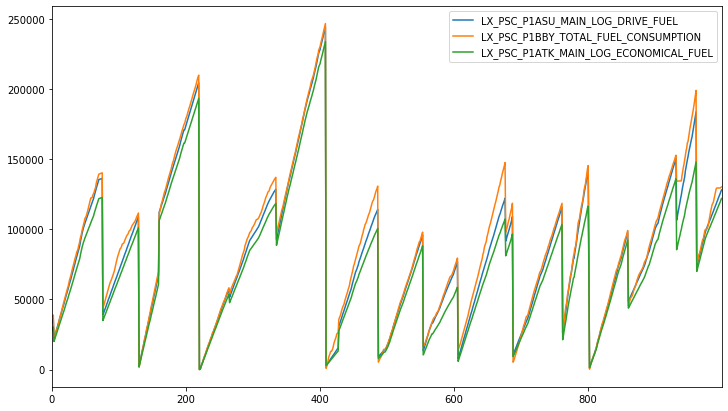

In [233]:
data[['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL']][:1000].plot(figsize=(12,7))

In [0]:
from copy import copy

In [0]:
# imputer
data_index = data[['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY', 'LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL']]

In [354]:
data.shape

(19954, 438)

In [0]:
train = data_index.dropna()

In [334]:
train.shape

(19691, 3)

In [0]:
X_train, X_test = train[:15000], train[-1000:]

In [0]:
X_test2 = copy(X_test)
X_test2['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL'] = np.nan

In [345]:
data_index.isnull().sum()

LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL         263
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION        0
LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY         0
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL    263
dtype: int64

In [0]:
imp = IterativeImputer(max_iter=10, random_state=42)

In [0]:
# find the missing values for this two features: LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL
results = pd.DataFrame(imp.fit_transform(data_index.values), columns=data_index.columns)

In [0]:
# update the main dataframe with this two new features:
data.update(results)

In [0]:
pred = imp.transform(X_test2.values)

In [362]:
##############
##########3
##########
data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].shape[0]

4092

In [0]:
data.isnull().sum().sort_values(ascending=False)